# Linear Regression

## Introduction

We have already learned about how two variables can be related through correlation (two variables move together: both increase and decrease together, or one increases while the other decreases). 

**In regression analysis, we will learn about how groups of variables can be correlated to a single target, or outcome, variable, and how these relationships can be used *to predict the future values of that outcome*.** We call the variables that are correlated with the outcome independent, or X variables, and the outcome variable the dependent, or Y variable. 

Regression analysis is one of the most common techniques used to make predictions. Depending on the question we would like to answer, and the format of the outcome variable, regression analysis can be used to both make **value predictions (what will my income be next year?)** and **classifications (based on the qualities of a song, will I like it or not?)**. The relationship between the X variables and the Y variables can also take different formats. The case that an increase or decrease in an X variable always produces the same, fixed increase or decrease in the Y variable is called **linear regression.** When this relationship is not always the same we classify it as **non-linear regression.**

In some cases, there is only one predictor variable, which makes the relation a simple **(univariate) linear regression.** In other cases, there are more than one predictor variables which is called **multiple (multivariate) linear regression.**



*   Linear Regression:


*   Non-linear Regression: 

![alt text](https://sixsigmastudyguide.com/wp-content/uploads/2019/11/non0.jpg)



## Simple Linear Regression (Univariate)

Univariate analysis, or simple linear regression, is when only one X (independent) variable is used to predict the outcome variable. In the case of linear univariate analysis, we can model this relationship using a straight line. The mathetical formula is:

$$Y = \beta_{0} + \beta_{1} X,$$

where:


*   X - Independent variable;
*   Y - Dependent variable;
*   $\beta_{1}$ - the quantity of change (positive or negative) that one can expect from a one unit increase in X. If we increase X by one unit, Y will increase by $\beta_{1}$ units. This is also sometimes referred to as ‘slope’; 
*   $\beta_{0}$ - intercept (or constant). This is the value at which the regression line crosses the y axis. 

![alt text](http://www.sthda.com/english/sthda-upload/images/machine-learning-essentials/linear-regression.png)

### Example 1: Python Implementation of Univariate Linear Regression

In this exercise, we will use data from a Fitbit, a personal health monitor. This dataset includes information on an individual’s activity levels (steps, calories, heart rate), exercise, sleep, as well as assorted community and personal profile information added by the user. Here we will use the Fitbit2.csv file and look at two specific columns related to sleep quality, ‘MinutesOfBeingAwake’ and ‘NumberOfAwakings’. Below, we use python code to build a scatter plot of the two columns.

In [0]:
import pandas as pd
import seaborn as sns

In [571]:
data = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/Fitbit2.csv')
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [572]:
data[["NumberOfAwakings", "MinutesOfBeingAwake"]].corr()

,NumberOfAwakings,MinutesOfBeingAwake
NumberOfAwakings,1.000000,0.951817
MinutesOfBeingAwake,0.951817,1.000000


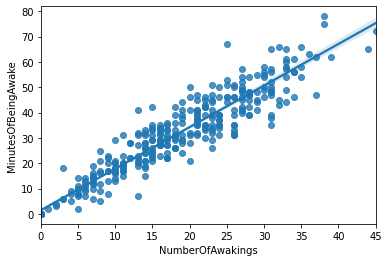

In [573]:
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)

Here, we can see that as the number of awakenings increases, so does the number of minutes of being awake. This makes sense, given that if you wake up more times in the night, you will also likely be awake for more time (even if you wake up for a short time).

But what on average, how many more minutes are you awake if you wake up one more time during the night? In other words, we want to know what is the slope of this line. We can answer this question if we establish a linear mathematical equation/relation between the two variables:

$$[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]$$

Here, the slope, or $\beta_{1}$, will tell us the average increase in awake time if we wake up one more time during the night. 

We can also see on the graph that the fitted line does not start at the origin (where the X and Y axes meet at 0,0). This means that the intercept, or where this line crosses the Y axis ($\beta_{0}$) will not be equal to zero, but to the value at which the line crosses the axis. 

The following Python code example shows you how to calculate the intercept and slope:

In [0]:
from scipy import stats

In [0]:
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [578]:
print ('The slope is, b1: ' + str(slope))
print ('The intercept is, b0: ' + str(intercept))

The slope is, b1: 1.6405141436199793
The intercept is, b0: 1.4381033523783202


We now know all the terms in our forumla. However, when working with large quantities of data, it is often easier to build a regression model. Let's have a look at how we would do that.

In [0]:
import statsmodels.api as sm

Before we move on, let us have a look at a visualisation of the method we will use to fit our data: https://seeing-theory.brown.edu/regression-analysis/index.html#section1

In [0]:
model = sm.OLS(Y,X)

In [0]:
results = model.fit()

In [0]:
predictions = results.predict(X)

In [584]:
pd.DataFrame({'observed':Y, 'predicted':predictions})

,observed,predicted
0,26,39.150073
1,35,35.745719
2,46,42.554427
3,31,35.745719
4,65,74.895792
...,...,...
362,33,30.639187
363,21,13.617417
364,35,25.532656
365,42,37.447896


In [585]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared (uncentered):                   0.971
Model:                             OLS   Adj. R-squared (uncentered):              0.971
Method:                  Least Squares   F-statistic:                          1.218e+04
Date:                 Thu, 16 Apr 2020   Prob (F-statistic):                   4.88e-283
Time:                         17:07:16   Log-Likelihood:                         -1161.7
No. Observations:                  367   AIC:                                      2325.
Df Residuals:                      366   BIC:                                      2329.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
NumberOfAwakings     1.7022      0.015    110.383      0.000       1.672       1.733
==============================================================================
Omnibus:                       13.367   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.053
Skew:                           0.092   Prob(JB):                     8.10e-07
Kurtosis:                       4.342   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Non-Linear Regression

It is possible that the relationship between an X variable and the Y variable is not linear. In this case, we have to add non-linearities to the mathematical model that we use. For example, if the non-linear relationship was quadratic, the univariate non-linear model could be written as below:

$$Y = \beta_{0} + \beta_{1} X^{2}$$

We will explore more complex non-linear models later on. 

where $Y$ is still the same, but we have added additional $X$’s to our equation. **We will use additional columns from the dataset to include as the predictor variables (hence multiple linear regression).** Please note that for now we are only using the columns that have numerical values.

## Multiple Linear Regression

We just explored how to predict an outcome using just one X variable. Now, let’s consider the case that we have multiple variables that all work together to explain the outcome variable. For instance, using the data above, let’s say we still want to predict the number of minutes a person is awake during the night. We think that this outcome could be determined by multiple factors in addition to the number of times a person wakes up during the night: the minutes of sleep they get overall, and their daytime activity level (maybe people who are more active are likely to sleep more).

We could add these variables to the same model we used before by finding the betas for each of these variables, and adding them to our equation:

$$Y = \beta_{0} + \beta_{1} X_{1} + ... + \beta_{n} X_{n}.$$

An example of this for 2 independent variables:

![alt text](https://miro.medium.com/max/1120/0*AqzOn7p--nveVULA.png)

## Logistic Regression

**Now, let’s imagine that the outcome we are interested in can only be one of two options. These problems are also known as classification/segmentation problem.** For example, consider the example of churn  for credit card companies. Churn is when a customer stops using a service in a certain period of time. Credit card companies want to retain as many customers as possible, so they are interested in predicting if a consumer will leave (churn) or not. Based on the historical data, they want to find out if the customer will continue using the card after a year or not. 

This problem can be answered by labeling the customers as *Yes (will churn)* or a *No (will not churn)*. This is a classic binary classification problem: there are two output choices. Similarly, when there are more than two output choices, it is called multi-class classification. We will talk about multi-class classification in later lectures.

Logistic Regression is a type of regression that allows for the outcome variable to be binary. Below, we can see that the shape of the logistic line allows for our outcome to be 0 or 1 (or some probability in between that we can round to 0 or 1). 

The mathematical way of writing this is as follows:

$$p(y) = \frac{1}{1 + e^{\beta_{0} + \beta_{1}X_{1} + ... \beta_{n}X_{n}}}.$$


This is also called a Sigmoid and it is displayed below:

![alt text](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

The idea here is that we assign some probability-value to a costumer. This probability indicates whether he or she will Churn (*Yes* or *No*). Usually, if p > 0.5, we will assign a 1 and a 0 otherwise.

### Example: Python Implementation of a Logistic Regression

Using Python to make Logistic Regression Model

We will use churn data for this example. 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [587]:
churnData = pd.read_csv('https://raw.githubusercontent.com/haggarw3/Datasets/master/Customer-Churn.csv')
churnData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
numericData = churnData[['tenure','SeniorCitizen','MonthlyCharges']]

In [589]:
numericData.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [0]:
Y = pd.DataFrame(data=churnData, columns=['Churn'])

In [0]:
#Y

In [0]:
transformer = StandardScaler().fit(churnData[['tenure','SeniorCitizen','MonthlyCharges']])

We will use a StandardScaler to transform and scale our data such that its distribution will have a mean value 0 and standard deviation of 1.




In [595]:
transformer

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_x = transformer.transform(churnData[['tenure','SeniorCitizen','MonthlyCharges']])

In [597]:
scaled_x

array([[-1.27744458, -0.43991649, -1.16032292],
       [ 0.06632742, -0.43991649, -0.25962894],
       [-1.23672422, -0.43991649, -0.36266036],
       ...,
       [-0.87024095, -0.43991649, -1.1686319 ],
       [-1.15528349,  2.27315869,  0.32033821],
       [ 1.36937906, -0.43991649,  1.35896134]])

Then we feed this scaled data to our logistic regression algorithm. 

In [0]:
lr_model = LogisticRegression()
lr_results = lr_model.fit(scaled_x, churnData['Churn'])

In [602]:
lr_predicted = lr_results.predict(scaled_x)
lr_predicted

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [0]:
#predicted_logis = classification.predict(scaled_x)
lr_predicted_df = pd.DataFrame(lr_predicted)

In [604]:
pred_true = pd.concat((lr_predicted_df, Y), axis = 1)
pred_true = pred_true.rename(columns= {0:"Predicted", "Churn": "True"})
pred_true

,Predicted,True
0,No,No
1,No,No
2,No,Yes
3,No,No
4,Yes,Yes
...,...,...
7038,No,No
7039,No,No
7040,No,No
7041,Yes,Yes


Now, for a particular combination of values for the X variables, we can make a prediction of the probability of the consumer churning. When we subject these predictions to a cutoff (ex: all probabilities above .5 are rounded to 1) we can predict if a consumer will churn or not.

Let us have a look at us have a look at a prediction the model makes for a new customer. 

In [0]:
#churnData[['tenure','SeniorCitizen','MonthlyCharges']]
john = np.array([34, 1, 123.20])

In [606]:
john.shape

(3,)

In [0]:
john = john.reshape(-1,1)

In [0]:
transformer_new_cust = StandardScaler().fit(john)
john = transformer_new_cust.transform(john)

In [613]:
lr_results.predict(john.reshape(1,3))

array(['Yes'], dtype=object)

## Evaluation (Linear) Regressions

Now we know how to predict a value for the outcome variable based on some data about the X variables. But how do we know that the line we have fitted to, or chosen to represent, our data is an accurate or inaccurate representation of the true relationship between the variables? 

### Fitted Values and Residuals
An important concept for understanding how well a line ‘fits’ is call the residuals.

First, **we know that our model has made some predictions for the value of Y. These are ‘fitted values’ and are denoted by y-hat.** These values lie on the line that we have drawn through our data. We can calculate these values like this:

$$predictions = [intercept + slope*x \text{for} x in X],$$

where $y$ denotes the true value and $\hat{y}$ the predicted value.

Let’s imagine that we save some of our Y values to compare to those Y values that our model predicts. The residual is the difference between the original value and the predicted value (error of the prediction, denoted by e-hat): 

$$e_{i} = y_{i} - \hat{y}_{i}.$$

In Python, we can calculate the residuals like this:


In [0]:
# Fit the model again
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']

model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

In [0]:
# Compute the resisudals
residuals = [Y[i] - predictions[i] for i in range(len(Y))]

In [617]:
pd.DataFrame({'observed':Y, 'predicted':predictions, 'Difference (Residual)': residuals})

,observed,predicted,Difference (Residual)
0,26,39.150073,-13.150073
1,35,35.745719,-0.745719
2,46,42.554427,3.445573
3,31,35.745719,-4.745719
4,65,74.895792,-9.895792
...,...,...,...
362,33,30.639187,2.360813
363,21,13.617417,7.382583
364,35,25.532656,9.467344
365,42,37.447896,4.552104


###How to find the best fitting model?

The way we draw the line in our data is the principal way in which we ensure that our line is a good ‘fit’. So how do we draw this line most accurately?

This is where the concept of residuals comes in. Least Squares Estimation or commonly known as OLS (ordinary least squares) finds the best line that fits the data such that the sum of the squared errors/residuals is minimized. The theory is the ideal straight line we draw should have the minimal total distances (errors) from all the data points. But because the residual values can be negative, we use the squared errors (squaring ensures that all the resulting values are positive). It is helpful to imagine this method as drawing a line that seems like it fits the data well, comparing the original value and the predicted value to obtain the residual, and then repeatedly re-drawing and adjusting the line so the total of all the residuals for all of the points is as small as possible.  It is important to note that this method is computationally inexpensive, but sensitive to outliers.  

### Model Accuracy 
**RMSE** (Root Mean Squared Error) is a measure of the overall accuracy of the model. It is the square root of the average squared error (or residual). Mathematically this is calculated as: 

$$\text{RMSE} = \sqrt{     \frac{\sum_{i=1}^{N}  (\hat{y}_{i} - y_{i})^{2}     }{N}  }.$$

To calculate RMSE in Python:

In [0]:
import numpy as np

In [0]:
RMSE = np.sqrt(np.mean([residual**2 for residual in residuals]))

In [620]:
print('The mean squared error of our model is:', RMSE)

The mean squared error of our model is: 5.733662480602974


**Given it is based off the errors in the Y variable, the RMSE has the same units as the outcome variable.** Lower values mean that variation in the data that the model does not explain is low, indicating a better fit.

**R squared:** This is another important statistic used to measure the accuracy of the model. It ranges from 0 to 1 and it measures the proportion of variation in the data that the model is able to capture. Usually the larger the value of R square, better is the model.  But this is not always true. We will talk about this in more detail later in this lesson. 

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

In [622]:
print('The r-squared score of our model is:', r2_score(Y, predictions))

The r-squared score of our model is: 0.9041121771627774


In [623]:
print('The root mean squared error of our model is:', np.sqrt(mean_squared_error(predictions, Y)))

The root mean squared error of our model is: 5.733662480602974


## Evaluation (Logistic) Regressions


Using the multivariable model we built with our Fitbit data, we can investigate some of these evaluation metrics using Python:

In [0]:
from sklearn import metrics

In [626]:
churnData['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [0]:
# Convert yes and no to binary ints
churnData['Churn'] = churnData['Churn'].replace('Yes', 1)
churnData['Churn'] = churnData['Churn'].replace('No', 0)

In [0]:
# Y
Y = churnData['Churn']

In [629]:
# Train the model once again
lr_model =  LogisticRegression()
lr_results = lr_model.fit(scaled_x, Y)
lr_predicted = lr_results.predict(scaled_x)
lr_predicted

array([0, 0, 0, ..., 0, 1, 0])

We will now evaluate the model using the accuracy metric. This metric simply measures how many predictings were correct divided by the total number of predictions. More information can be found [here](https://developers.google.com/machine-learning/crash-course/classification/accuracy).

In [630]:
# Compute the accoracy
print("Accuracy:",metrics.accuracy_score(lr_predicted, Y))

Accuracy: 0.7911401391452506


As we have seen, Linear Regression is a very useful model. However, it has some limitations, and therefore is best used in specific situations. These limitations come from the assumptions that the model makes about the relationships between variables in the data.



* Relationship between the outcomes and the predictors is linear.
* Errors are uncorrelated
* Errors are normally distributed with mean 0 and constant variance.

To check these assumptions we use residual analysis plots such as QQ plot / Quantile Plots, normal probability plots of the residuals, plots of the residuals vs fitted values. We will not go over these methods in this class but it is worth mentioning. 


## Summary 

In this lesson we learned about univariate and multivariable linear regression and logistic regression techniques. We also explored some applications of regression analysis to solve problems of prediction and classification. 